In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import special as sp

# Problem 3

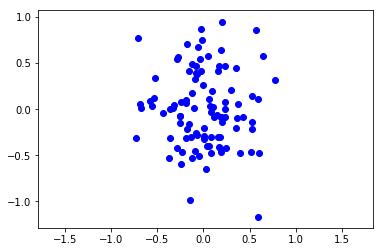

In [3]:
mean1 = np.array([0,0]).T
cov1 = np.array([
    [0.1,0],
    [0,0.15]
])
X1 = np.random.multivariate_normal(mean1, cov1, 100)
plt.scatter(X1[:,0], X1[:,1], c='blue')
plt.axis('equal')
plt.show()

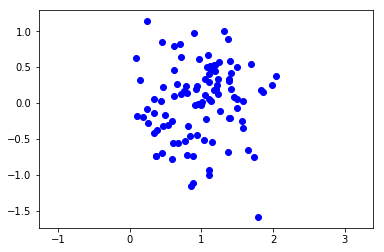

In [4]:
mean2 = np.array([1,0]).T
cov2 = np.array([
    [0.2,0],
    [0,0.25]
])
X2 = np.random.multivariate_normal(mean2, cov2, 100)
plt.scatter(X2[:,0], X2[:,1], c='blue')
plt.axis('equal')
plt.show()

In [5]:
#correct 
correct1 = 0
false1 = 0
for i in X1:
    node = 2*i[0]-i[1]
    if node<1/2:
        correct1 += 1
    else:
        false1 +=1
print("we have" ,correct1,"correct and ",false1,"false")

we have 74 correct and  26 false


In [6]:
#correct 
correct2 = 0
false2 = 0
for i in X2:
    node = 2*i[0]-i[1]
    if node>1/2:
        correct2 += 1
    else:
        false2 +=1
print("we have" ,correct2,"correct and ",false2,"false")
        

we have 94 correct and  6 false


In [7]:
#probability of error 
pe = (false1+false2)/200
pe

0.16

# Problem 4

## First we plot part ROC curve for part A

In [8]:
def qfunc(x):
    return 0.5-0.5*sp.erf(x/np.sqrt(2))

In [9]:
#case 1 
landa1 = np.random.uniform(-5, -2, 200)
PFA1 = list()
PD1 = list()
for i in landa1:
    PFA1.append(1-qfunc((-2-i)/2))
    PD1.append(1-qfunc((2-i)/2))

In [10]:
#case 2
landa2 = np.random.uniform(2, -1.9, 200)
PFA2 = list()
PD2 = list()
for i in landa2:
    PFA2.append(qfunc((2+i)/2))
    PD2.append(1-qfunc((2-i)/2))

In [11]:
#case 3
landa3 = np.random.uniform(5, 2, 200)
PFA3 = list()
PD3 = list()
for i in landa3:
    PFA3.append(qfunc((2+i)/2))
    PD3.append(qfunc((i-2)/2))

In [12]:
PFA = PFA1+PFA2+PFA3
PD = PD1+PD2+PD3
PFA = np.sort(PFA)
PD = np.sort(PD)

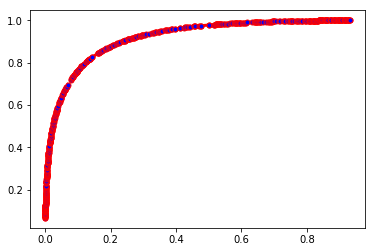

In [13]:
plt.plot(PFA, PD, color='red', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5)
plt.show()

## We increase the Sigma to see how ROC Curve changes 

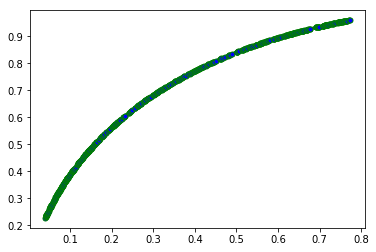

In [14]:
#case 1 
landa1 = np.random.uniform(-5, -2, 200)
PFA1 = list()
PD1 = list()
for i in landa1:
    PFA1.append(1-qfunc((-2-i)/4))
    PD1.append(1-qfunc((2-i)/4))
#case 2
landa2 = np.random.uniform(2, -1.9, 200)
PFA2 = list()
PD2 = list()
for i in landa2:
    PFA2.append(qfunc((2+i)/4))
    PD2.append(1-qfunc((2-i)/4))
#case 3
landa3 = np.random.uniform(5, 2, 200)
PFA3 = list()
PD3 = list()
for i in landa3:
    PFA3.append(qfunc((2+i)/4))
    PD3.append(qfunc((i-2)/4))
PFA = PFA1+PFA2+PFA3
PD = PD1+PD2+PD3
PFA = np.sort(PFA)
PD = np.sort(PD)
plt.plot(PFA, PD, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5)
plt.show()

## We decrese the Sigma to 1 to see how RUC Curve change

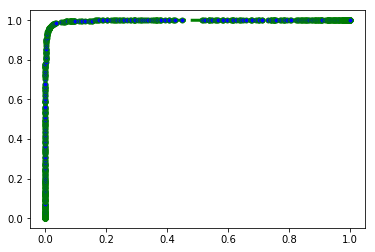

In [15]:
#case 1 
landa1 = np.random.uniform(-5, -2, 200)
PFA1 = list()
PD1 = list()
for i in landa1:
    PFA1.append(1-qfunc((-2-i)))
    PD1.append(1-qfunc((2-i)))
#case 2
landa2 = np.random.uniform(2, -1.9, 200)
PFA2 = list()
PD2 = list()
for i in landa2:
    PFA2.append(qfunc((2+i)))
    PD2.append(1-qfunc((2-i)))
#case 3
landa3 = np.random.uniform(5, 2, 200)
PFA3 = list()
PD3 = list()
for i in landa3:
    PFA3.append(qfunc((2+i)))
    PD3.append(qfunc((i-2)))
PFA = PFA1+PFA2+PFA3
PD = PD1+PD2+PD3
PFA = np.sort(PFA)
PD = np.sort(PD)
plt.plot(PFA, PD, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5)
plt.show()

### As we can see smaller sigma results in better ROC curve 

# Problem 5
### first the algorithm of the questions 

In [16]:
fx = lambda x: x^2 - 7*x +6
fn = lambda x: (2*x) - (7)
epsilon = 0.00001
x = 3
for i in range(1000000):
    x = x - epsilon * fn(x)
print(x)

3.499999998969629


#### in another way with rate of learning and precision 

In [17]:
cur_x = 3
rate = 0.5
precision = 0.001
previous_step_size = 1
max_iters = 1000
iters = 0
df = lambda x: (2*x) - (7)

In [18]:
while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x 
    cur_x = cur_x - rate * df(prev_x) 
    previous_step_size = abs(cur_x - prev_x)
    iters = iters+1 
    
print("The local minimum occurs at", cur_x)

The local minimum occurs at 3.5
